### Teacher Model Definition

In [ ]:
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Filter for classes 0, 1, 2 (keep only these labels)
train_filter = np.isin(y_train, [0, 1, 2])  # Boolean mask
test_filter = np.isin(y_test, [0, 1, 2])    # Boolean mask

# Apply the filter
x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.4, random_state=42, stratify=y_test)

# Print new dataset shapes
print("Final x_train shape:", x_train.shape)
print("Final y_train shape:", y_train.shape)
print("Final x_test shape:", x_test.shape)
print("Final y_test shape:", y_test.shape)
print("Final x_val shape:", x_val.shape)
print("Final y_val shape:", y_val.shape)

2025-03-20 14:42:39.469519: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-20 14:42:39.788923: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-20 14:42:40.074264: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742456560.308671   26980 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742456560.377708   26980 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-20 14:42:40.974839: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Final x_train shape: (18623, 28, 28)
Final y_train shape: (18623,)
Final x_test shape: (1888, 28, 28)
Final y_test shape: (1888,)
Final x_val shape: (1259, 28, 28)
Final y_val shape: (1259,)


In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential 


model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)), 
    MaxPooling2D((2, 2)), 
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    GlobalAveragePooling2D(), 
    Dense(256, activation='relu'), 
    Dense(64, activation='relu'), 
    Dense(3, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=tf.optimizers.Adam(), 
    metrics=['accuracy']
)

hist = model.fit(
    x_train, y_train, 
    epochs=10, 
    validation_data=(x_val, y_val),
    batch_size=32,
    verbose=1
)

/home/gfspet/miniconda3/envs/kidney-disease/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-20 14:42:53.946937: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.7298 - loss: 0.5299 - val_accuracy: 0.9611 - val_loss: 0.1310
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9689 - loss: 0.0953 - val_accuracy: 0.9849 - val_loss: 0.0486
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9793 - loss: 0.0649 - val_accuracy: 0.9889 - val_loss: 0.0390
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9834 - loss: 0.0500 - val_accuracy: 0.9857 - val_loss: 0.0320
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9853 - loss: 0.0461 - val_accuracy: 0.9881 - val_loss: 0.0294
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9883 - loss: 0.0381 - val_accuracy: 0.9913 - val_loss: 0.0277
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9890 - loss: 0.0327 - val_accuracy: 0.9881 - val_loss: 0.0340
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9900 - loss: 0.0293 - 

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       588
           1       0.99      1.00      0.99       681
           2       1.00      0.97      0.98       619

    accuracy                           0.99      1888
   macro avg       0.99      0.99      0.99      1888
weighted avg       0.99      0.99      0.99      1888



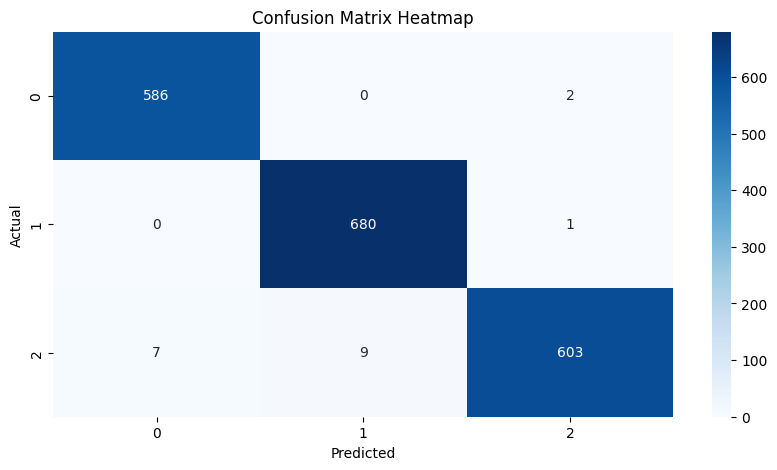

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import classification_report, confusion_matrix

teacher_pred_probs = model.predict(x_test)
teacher_pred = np.argmax(teacher_pred_probs, axis=1)

print(classification_report(y_test, teacher_pred))

conf_matrix = confusion_matrix(y_test, teacher_pred) 

plt.figure(figsize=(10, 5)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

---

### Knowledge Distillation Implementation 

KD Configurations

In [4]:
import gc
import tensorflow.keras.backend as K

gc.collect()
K.clear_session()

In [ ]:
from tensorflow.keras.losses import KLDivergence

# Set Temperature 
T = 3 

# # Define Knowledge Distilation Loss 
alpha = 0.5 

def distill_loss(y_true, y_pred, teacher_pred, temperature=3.0, alpha=0.5):
    """
    Knowledge distillation loss combining soft and hard labels.
    """
    y_pred_soft = tf.nn.softmax(y_pred / temperature)
    teacher_soft = tf.nn.softmax(teacher_pred / temperature)

    kl_loss = tf.keras.losses.KLDivergence(reduction=tf.keras.losses.Reduction.NONE)(teacher_soft, y_pred_soft)  # No batch reduction
    kl_loss = tf.reduce_mean(kl_loss, axis=-1)  # Mean over classes

    ce_loss = tf.keras.losses.SparseCategoricalCrossentropy()(y_true, y_pred)  # One-hot labels expected

    return alpha * ce_loss + (1 - alpha) * kl_loss

In [30]:
# Student Model 
student = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)), 
    Conv2D(32, (3, 3), activation='relu', padding='same'), 
    MaxPooling2D((2, 2)), 
    GlobalAveragePooling2D(), 
    Dense(64, activation='relu'), 
    Dense(3, activation='softmax')
])

teacher_pred = model.predict(x_train)  # Precompute teacher soft labels

def loss_fn(y_true, y_pred):
    batch_indices = tf.range(tf.shape(y_true)[0])  # Get batch indices
    teacher_pred_batch = tf.gather(teacher_pred, batch_indices)  # Select only batch samples
    return distill_loss(y_true, y_pred, teacher_pred_batch)  # Pass correct batch teacher predictions

student.compile(
    loss=loss_fn,  # Use precomputed teacher predictions
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(8).prefetch(tf.data.AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(8).prefetch(tf.data.AUTOTUNE)

hist_student = student.fit(
    train_ds, 
    epochs=10, 
    validation_data=val_ds, 
    verbose=1)

582/582 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Epoch 1/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7984 - loss: 0.2347 - val_accuracy: 0.9738 - val_loss: 0.0622
Epoch 2/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9705 - loss: 0.0611 - val_accuracy: 0.9722 - val_loss: 0.0627
Epoch 3/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9812 - loss: 0.0442 - val_accuracy: 0.9833 - val_loss: 0.0446
Epoch 4/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9855 - loss: 0.0372 - val_accuracy: 0.9897 - val_loss: 0.0307
Epoch 5/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9878 - loss: 0.0331 - val_accuracy: 0.9921 - val_loss: 0.0276
Epoch 6/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9892 - loss: 0.0305 - val_accuracy: 0.9897 - val_loss: 0.0279
Epoch 7/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9907 - loss: 0.0278 - val_accuracy: 0.9873 - val_loss: 0.0315
Epoch 8/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       588
           1       1.00      1.00      1.00       681
           2       0.98      1.00      0.99       619

    accuracy                           0.99      1888
   macro avg       0.99      0.99      0.99      1888
weighted avg       0.99      0.99      0.99      1888



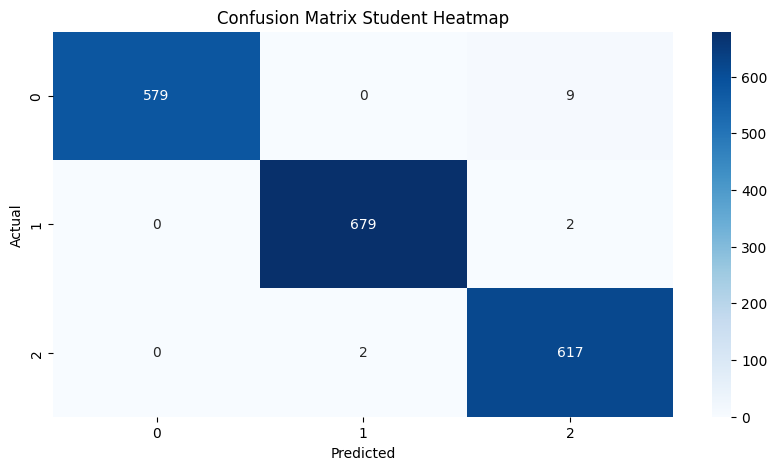

In [31]:
student_probs = student.predict(x_test)
student_pred = np.argmax(student_probs, axis=1)

print(classification_report(y_test, student_pred))

conf_matrix = confusion_matrix(y_test, student_pred) 

plt.figure(figsize=(10, 5)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Student Heatmap')
plt.show()

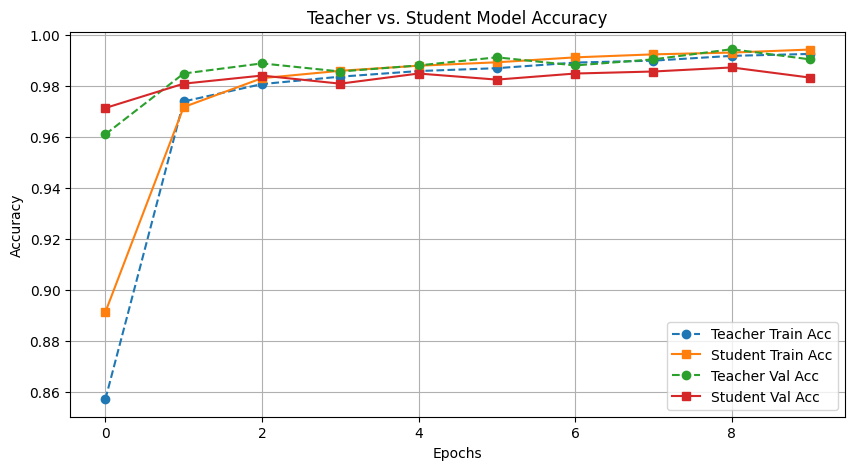

In [18]:
epochs = range(len(hist.history['accuracy']))  # Assuming same number of epochs for both

plt.figure(figsize=(10, 5))

# Plot training accuracy
plt.plot(epochs, hist.history['accuracy'], label='Teacher Train Acc', linestyle='--', marker='o')
plt.plot(epochs, hist_student.history['accuracy'], label='Student Train Acc', linestyle='-', marker='s')

# Plot validation accuracy
plt.plot(epochs, hist.history['val_accuracy'], label='Teacher Val Acc', linestyle='--', marker='o')
plt.plot(epochs, hist_student.history['val_accuracy'], label='Student Val Acc', linestyle='-', marker='s')

# Labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Teacher vs. Student Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import os 

def get_model_size(model, filename="temp_model.keras"):
    model.save(filename)  # Save model as .keras
    size = os.path.getsize(filename) / (1024 * 1024)  # Convert to MB
    os.remove(filename)  # Cleanup
    return size

def count_params(model):
    return model.count_params()

print(f"📏 Teacher Model Size: {get_model_size(model):.2f} MB, Parameters: {count_params(model):,}")
print(f"📏 Student Model Size: {get_model_size(student):.2f} MB, Parameters: {count_params(student):,}")

📏 Teacher Model Size: 0.85 MB, Parameters: 70,851
📏 Student Model Size: 0.17 MB, Parameters: 11,875


In [129]:
os.makedirs('models/', exist_ok=True)
model.save('models/teacher_baseline.keras')
student.save('models/student_baseline.keras')

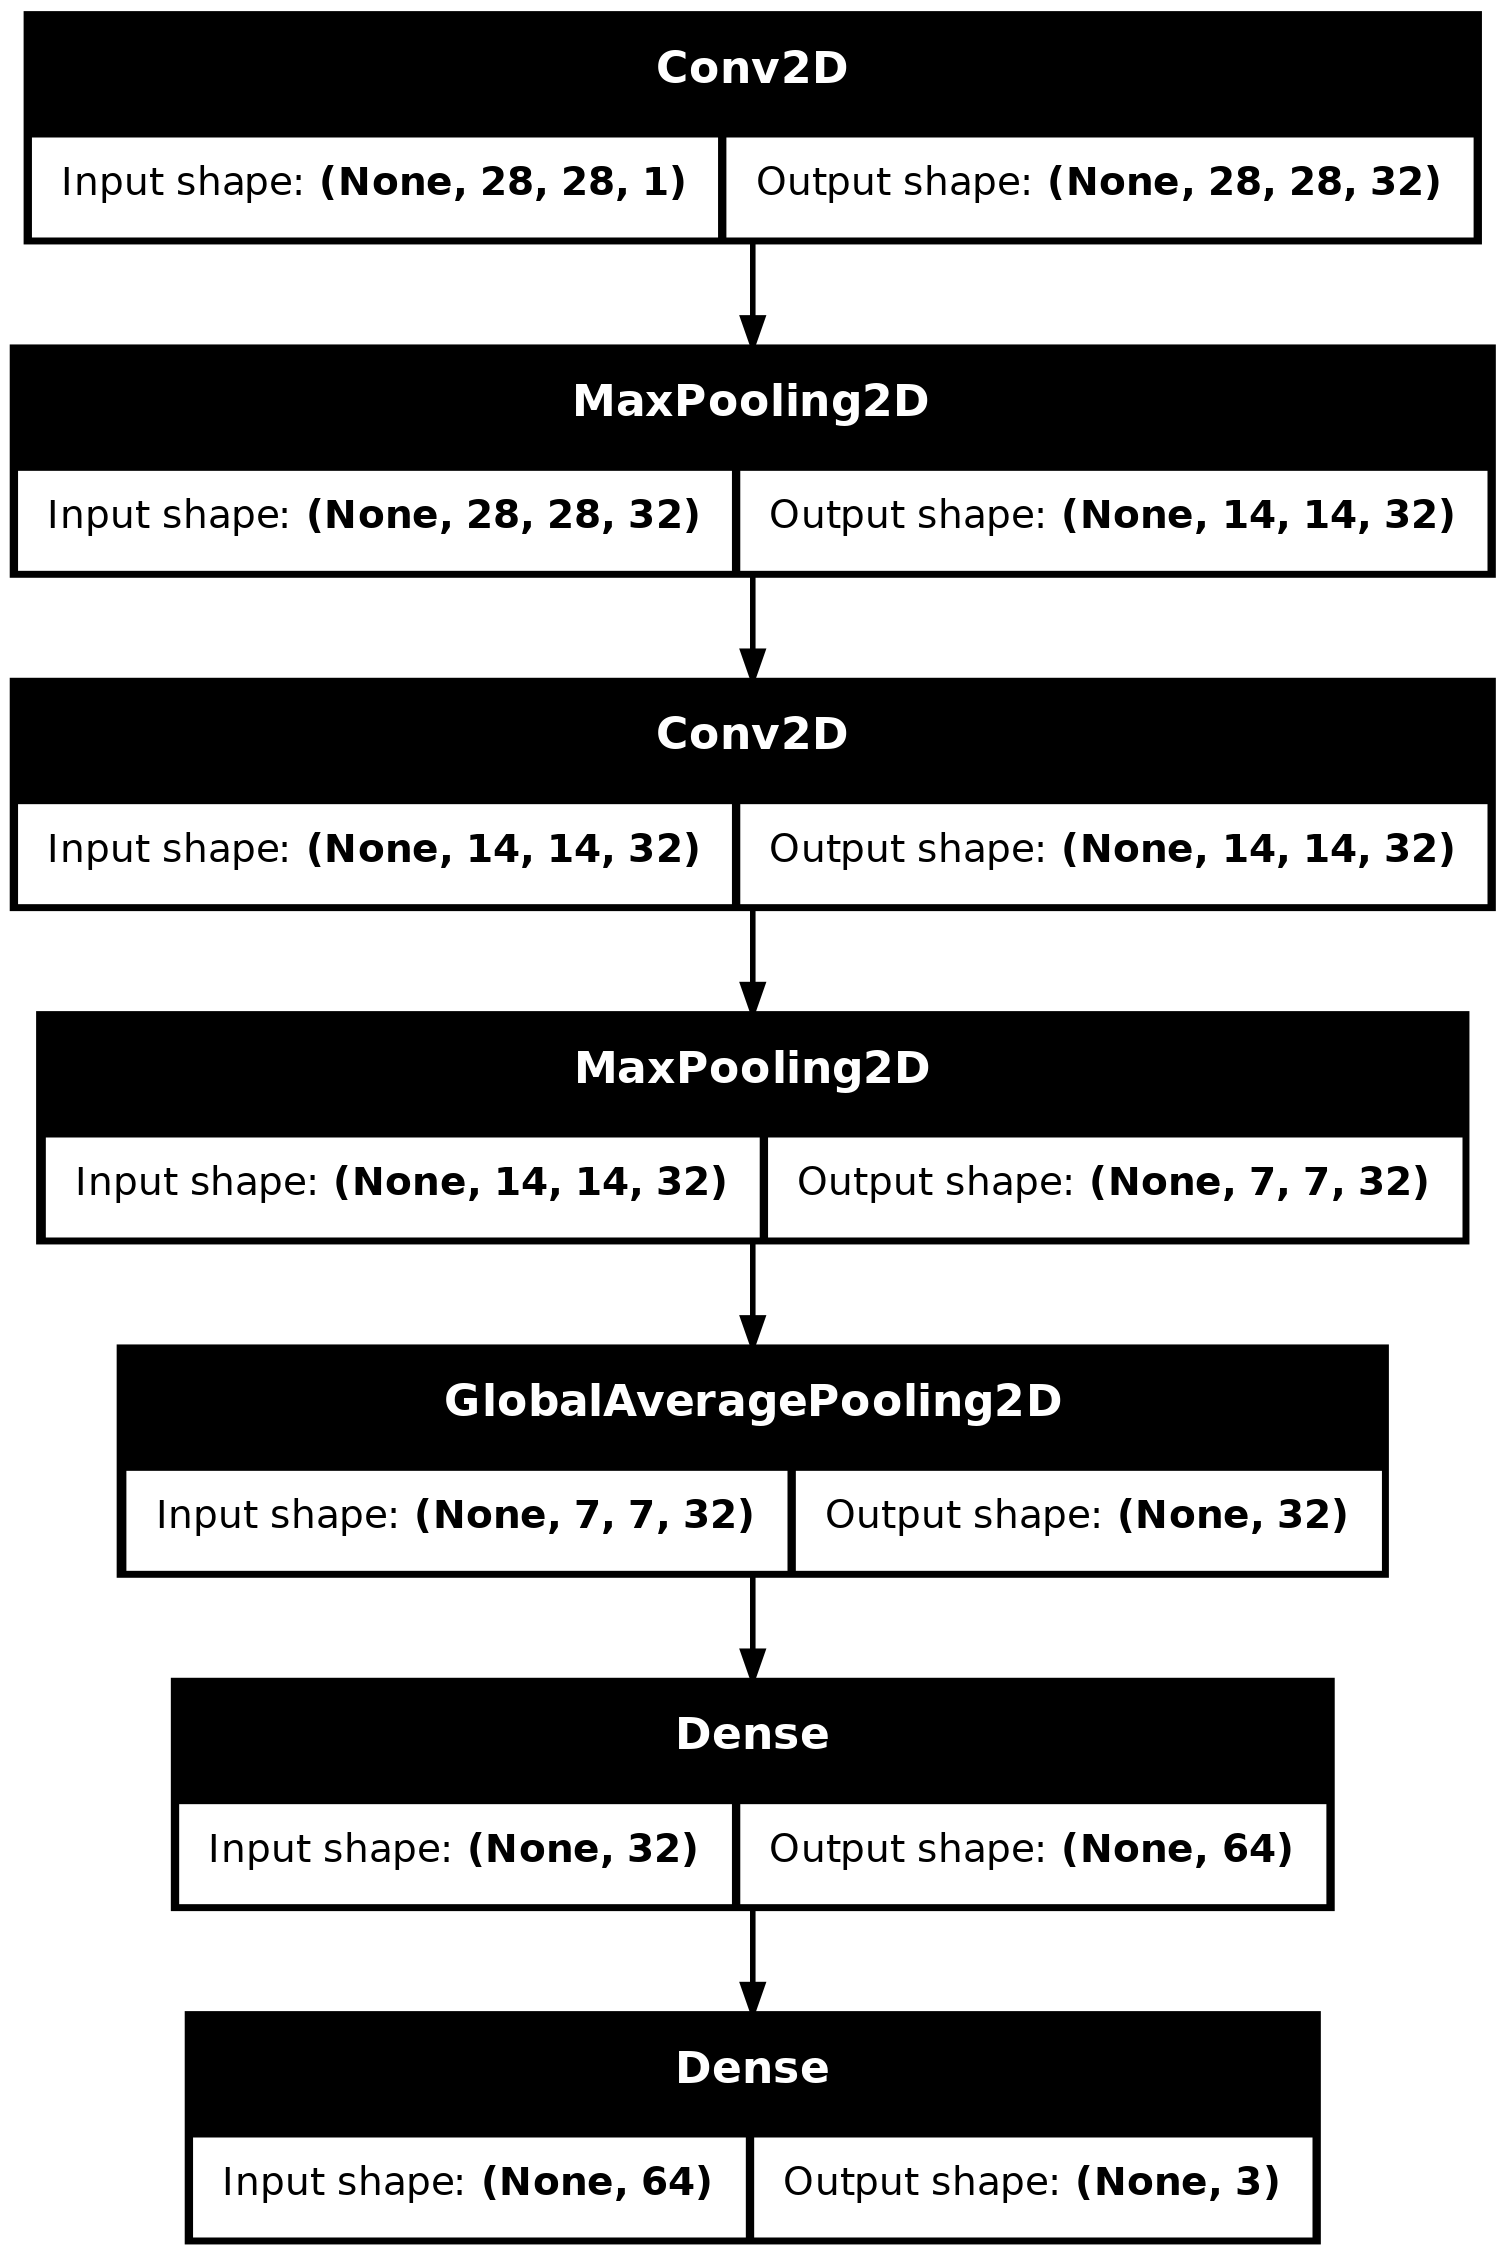

In [127]:
tf.keras.utils.plot_model(model, to_file="teacher_model.png", show_shapes=True)
tf.keras.utils.plot_model(student, to_file="student_model.png", show_shapes=True)

In [ ]:
import time


def measure_latency(model, sample_input):
    start_time = time.time()
    model.predict(sample_input, verbose=0)
    return (time.time() - start_time) * 1000  # Convert to milliseconds

_ = model.predict(np.expand_dims(x_test[0], axis=0), verbose=0)
_ = student.predict(np.expand_dims(x_test[0], axis=0), verbose=0)

teacher_latency = []
student_latency = []

batch_size = 32

for i in range(10): 
    sample = np.random.rand(batch_size, *x_test.shape[1:]) 
    
    teach_speed = measure_latency(model, sample)
    stu_speed = measure_latency(student, sample)
    
    teacher_latency.append(teach_speed)
    student_latency.append(stu_speed)
    
print(f"🚀 Teacher Average Inference Time: {np.mean(teacher_latency)} ms")
print(f"🚀 Student Average Inference Time: {np.mean(student_latency)} ms")

# sample = np.expand_dims(x_test[0], axis=0) # Take one sample
sample = np.random.rand(batch_size, *x_test.shape[1:]) 
print(f"🚀 Teacher Inference Time: {measure_latency(model, sample):.2f} ms")
print(f"🚀 Student Inference Time: {measure_latency(student, sample):.2f} ms")

🚀 Teacher Average Inference Time: 42.75777339935303 ms
🚀 Student Average Inference Time: 40.83211421966553 ms
🚀 Teacher Inference Time: 37.84 ms
🚀 Student Inference Time: 35.72 ms


In [ ]:
sample = np.random.rand(32, *x_test.shape[1:])  
print(f"🚀 Teacher Time: {measure_latency(model, sample):.2f} ms")
print(f"🚀 Student Time: {measure_latency(student, sample):.2f} ms")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
🚀 Teacher Time: 46.23 ms
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
🚀 Student Time: 41.74 ms
